In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
# MNIST digits classification dataset
from keras.datasets import mnist

#Prepare Data : Load mnist data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Train Dataset : This is a dataset of 60,000 28x28 grayscale images of the 10 digits

# Test Dataset : 10,000 28x28 grayscale images to test the trained model



11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Can check the shape of mnist data :

print("Training data shape : ", X_train.shape)
print("Training label shape : ", Y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing label shape : ", Y_test.shape)

Training data shape :  (60000, 28, 28)
Training label shape :  (60000,)
Testing data shape :  (10000, 28, 28)
Testing label shape :  (10000,)


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Prepare Data : Reshape

X_train = X_train.reshape(60000, 28*28).astype('float32')
X_test = X_test.reshape(10000, 28*28).astype('float32')

# X_train & X_test data is 2-dimensional data → Reshape it to 1-dimensional data for Keras. (Serialize)

# Convert data type to floating point data type (float32)

# Prepare Data : Normalize

X_train = X_train/255.0
X_test = X_test/255.0

# Normalize it to 0.0~1.0
# It will reduce the processing time.

# Prepare Data :  One-Hot-Encoding

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)




In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# MNIST in Tensorflow & Keras
# Design Model (Architecture) : Use Keras Sequential model

# The Sequential model allows you to create models layer-by-layer for most problems.
# Linear stack of layers.
model = Sequential()

# Design Model (Architecture) : Add the hidden layer
# Add a layer to model.
# In this case, we get the 784(28*28) inputs from input layer
# Activation functions : How the weighted sum ofthe input is transformed into an output
# Activation functions in keras: relu, sigmoid, tanh, elu

model.add(Dense(units=256, input_dim=28*28, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Design Model (Architecture) : Summary of model
model.summary()
print("\nNumber of weights for all inputs + bias")
print("28*28 input to 4 neurons = 4*784 = 31364 bias for 4 neurons = 4 ")

# Design Model (Architecture) : Compile model
# sgd : Stochastic gradient descent optimizer
# Loss function : Calculate the error of the predict result.
# metric : Use to evaluate the performance of model - accuracy will save accuracy & error of model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________

Number of weights for all inputs + bias
28*28 inp

In [ ]:
# Train designed model with prepared data
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_split=0.3)


Epoch 1/20
420/420 [==============================] - 4s 5ms/step - loss: 1.5698 - accuracy: 0.5435 - val_loss: 0.7067 - val_accuracy: 0.8209
Epoch 2/20
420/420 [==============================] - 2s 5ms/step - loss: 0.5235 - accuracy: 0.8570 - val_loss: 0.4042 - val_accuracy: 0.8859
Epoch 3/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3711 - accuracy: 0.8944 - val_loss: 0.3303 - val_accuracy: 0.9044
Epoch 4/20
420/420 [==============================] - 2s 5ms/step - loss: 0.3108 - accuracy: 0.9103 - val_loss: 0.2887 - val_accuracy: 0.9170
Epoch 5/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2711 - accuracy: 0.9218 - val_loss: 0.2587 - val_accuracy: 0.9273
Epoch 6/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2423 - accuracy: 0.9298 - val_loss: 0.2419 - val_accuracy: 0.9299
Epoch 7/20
420/420 [==============================] - 2s 5ms/step - loss: 0.2192 - accuracy: 0.9368 - val_loss: 0.2341 - val_accuracy: 0.9338
Epoch 

In [ ]:
# Evaluate trained model with test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1182 - accuracy: 0.9643
Test loss: 0.118
Test accuracy: 0.964


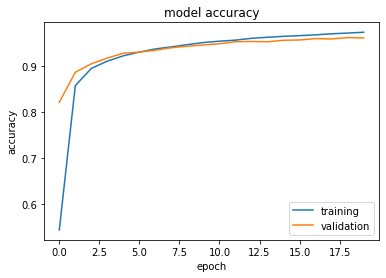

In [ ]:
# Draw plot of accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

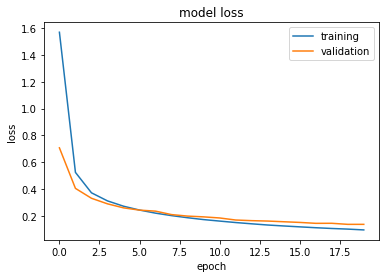

In [ ]:
#Draw plot of loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()